<a href="https://colab.research.google.com/github/Vasiliki655/DSC511-Introduction/blob/main/Preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [4]:
data=pd.read_csv("IS Claims List.csv")

In [3]:
data.head()

,Segment_ID,Invoice Nbr OBF,Invoice Date,Billing Provider Code OBF,Billing Provider Type,Professional Code OBF,Claim Specialty Id,Claim Speciality,Life Nbr OBF,Service From Date,Service To Date,Length of Stay
0,IS,780200082,2/10/2024 0:00,F14624,OKYPY,D32185,ISOR,ORTHOPAEDICS,5218808,7/21/2023,2/10/2024,204
1,IS,792808660,2/6/2024 0:00,C21770,NON-OKYPY,D61598,ISON,MEDICAL ONCOLOGY,853944,9/4/2023,2/6/2024,155
2,IS,792811418,1/10/2024 0:00,C21770,NON-OKYPY,D39648,ISON,MEDICAL ONCOLOGY,2372395,8/29/2023,1/10/2024,134
3,IS,792813675,2/2/2024 0:00,C21770,NON-OKYPY,D61598,ISON,MEDICAL ONCOLOGY,5975327,8/17/2023,2/2/2024,169
4,IS,834038206,3/30/2024 0:00,F14282,OKYPY,D52484,ISDOC,DOCTOR,6948814,10/4/2023,3/30/2024,178


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Segment_ID                 293481 non-null  object
 1   Invoice Nbr OBF            293481 non-null  int64 
 2   Invoice Date               293481 non-null  object
 3   Billing Provider Code OBF  293481 non-null  object
 4   Billing Provider Type      293481 non-null  object
 5   Professional Code OBF      293481 non-null  object
 6   Claim Specialty Id         293481 non-null  object
 7   Claim Speciality           293481 non-null  object
 8   Life Nbr OBF               293481 non-null  int64 
 9   Service From Date          293481 non-null  object
 10  Service To Date            293481 non-null  object
 11  Length of Stay             293481 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 26.9+ MB


We do not have any missing values

In [6]:
# number of unique values per column
data.nunique()

,0
Segment_ID,1
Invoice Nbr OBF,293480
Invoice Date,366
Billing Provider Code OBF,73
Billing Provider Type,2
Professional Code OBF,1590
Claim Specialty Id,41
Claim Speciality,41
Life Nbr OBF,139314
Service From Date,523


In [7]:
# count of unique values of "Invoice Date" Column
data["Invoice Date"].value_counts()

,count
Invoice Date,
12/31/2024 0:00,1843
12/23/2024 0:00,1421
10/31/2024 0:00,1372
11/29/2024 0:00,1370
12/27/2024 0:00,1367
...,...
3/18/2024 0:00,163
8/18/2024 0:00,145
5/6/2024 0:00,130


In [8]:
# count of unique values of "Billing Provider Type" Column
data["Billing Provider Type"].value_counts()

,count
Billing Provider Type,
NON-OKYPY,195518
OKYPY,97963


In [9]:
# unique values of "Claim Speciality" column
data["Claim Speciality"].unique()

array(['ORTHOPAEDICS', 'MEDICAL ONCOLOGY', 'DOCTOR', 'CARDIOLOGY',
       'SPECIALISED IN NEONATOLOGY', 'UROLOGY', 'GENERAL SURGERY',
       'OBSTETRICS - GYNAECOLOGY', 'OTORHINOLARYNGOLOGY',
       'INTERNAL MEDICINE', 'RENAL DISEASES', 'RESPIRATORY MEDICINE',
       'GASTROENTEROLOGY', 'DERMATO-VENEREOLOGY', 'HAEMATOLOGY',
       'PD - Adult Internal Medicine', 'RADIATION ONCOLOGY',
       'NEUROLOGICAL SURGERY', 'PALLIATIVE CARE SERVICES',
       'OPHTHALMOLOGY', 'NEUROLOGY', 'THORACIC SURGERY / CARDIO SURGERY',
       'PD - Child Pediatrics', 'ENDOCRINOLOGY',
       'SPECIALISED IN INTENSIVE CARE', 'PAEDIATRICS',
       'PAEDIATRIC SURGERY', 'PLASTIC SURGERY', 'DIAGNOSTIC RADIOLOGY',
       'ORAL AND MAXILLO-FACIAL SURGERY', 'VASCULAR SURGERY',
       'CHILD & ADOLESCENT PSYCHIATRY', 'RHEUMATOLOGY',
       'PHYSICAL MEDICINE AND REHABILITATION', 'NUCLEAR MEDICINE',
       'ANESTHESIOLOGY', 'SPECIALISED IN INFECTIOUS DISEASES',
       'PSYCHIATRY', 'SPECIALISED IN PAEDIATRIC NEUROLO

#Pre-processing

In [11]:
# make dataframe
data["Invoice Date"] = pd.to_datetime(data["Invoice Date"])

In [14]:
data["Invoice Date"].head()

,Invoice Date
0,2024-02-10
1,2024-02-06
2,2024-01-10
3,2024-02-02
4,2024-03-30


In [162]:
data["Invoice Date"].dt.year.unique()

array([2024], dtype=int32)

The payment are done only the year 2024

In [79]:
data["Service From Date"] = pd.to_datetime(data["Service From Date"])
data["Service To Date"] = pd.to_datetime(data["Service To Date"])

In [85]:
data['time_diff'] = data["Service From Date"] - data["Service To Date"]

data['time_diff']=data['time_diff'].abs()
data['days'] = data['time_diff'].dt.days

In [90]:
data['days'].equals(data['Length of Stay'])

## This shows that the 'Length of Stay' is measure with days

## Remove the columns that we have created
data.drop(['time_diff', 'days'], axis=1, inplace=True)

KeyError: 'days'

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Segment_ID                 293481 non-null  object        
 1   Invoice Nbr OBF            293481 non-null  int64         
 2   Invoice Date               293481 non-null  datetime64[ns]
 3   Billing Provider Code OBF  293481 non-null  object        
 4   Billing Provider Type      293481 non-null  object        
 5   Professional Code OBF      293481 non-null  object        
 6   Claim Specialty Id         293481 non-null  object        
 7   Claim Speciality           293481 non-null  object        
 8   Life Nbr OBF               293481 non-null  int64         
 9   Service From Date          293481 non-null  datetime64[ns]
 10  Service To Date            293481 non-null  datetime64[ns]
 11  Length of Stay             293481 non-null  int64   

In [128]:
data['Invoice Date'].equals(data['Service To Date'])

False

In [132]:
data[data['Invoice Date'] != data['Service To Date']].size


308

In [133]:
data[data['Invoice Date'] != data['Service To Date']]

,Segment_ID,Invoice Nbr OBF,Invoice Date,Billing Provider Code OBF,Billing Provider Type,Professional Code OBF,Claim Specialty Id,Claim Speciality,Life Nbr OBF,Service From Date,Service To Date,Length of Stay,Day,Month
23964,IS,891283449,2024-01-19,F14624,OKYPY,D25573,ISHEM,HAEMATOLOGY,3277216,2023-11-02,2023-12-20,48,19,1
51551,IS,917192421,2024-03-22,C24520,NON-OKYPY,D58886,ISAN,ANESTHESIOLOGY,655094,2023-12-15,2024-01-08,24,22,3
69620,IS,933599943,2024-04-11,F14282,OKYPY,D50227,ISGS,GENERAL SURGERY,11847591,2024-01-08,2024-01-11,3,11,4
72507,IS,936165458,2024-02-13,F14539,OKYPY,D28770,ISIM,INTERNAL MEDICINE,5907798,2024-01-17,2024-02-18,32,13,2
77525,IS,940725954,2024-04-16,C38102,NON-OKYPY,D68513,ISIM,INTERNAL MEDICINE,9020278,2024-04-15,2024-04-15,0,16,4
102167,IS,963821708,2024-05-21,C25304,NON-OKYPY,D19698,ISOBG,OBSTETRICS - GYNAECOLOGY,10810752,2022-08-31,2022-09-01,1,21,5
102227,IS,963877577,2024-05-01,F14282,OKYPY,D22659,ISPDPED,PD - Child Pediatrics,12443476,2024-03-30,2024-04-01,2,1,5
128182,IS,987353123,2024-04-25,C28323,NON-OKYPY,D40469,ISOPH,OPHTHALMOLOGY,4861394,2024-04-25,2024-04-27,2,25,4
137283,IS,995357406,2024-05-28,C28323,NON-OKYPY,D35942,ISOR,ORTHOPAEDICS,3146633,2024-05-27,2024-05-31,4,28,5
145171,IS,1002059065,2024-07-04,F14624,OKYPY,D26028,ISNS,NEUROLOGICAL SURGERY,396615,2024-05-17,2024-06-14,28,4,7


In [167]:
data["Service From Date"].dt.year.value_counts()

,count
Service From Date,
2024,291007
2023,2470
2022,3
2021,1


#EDA

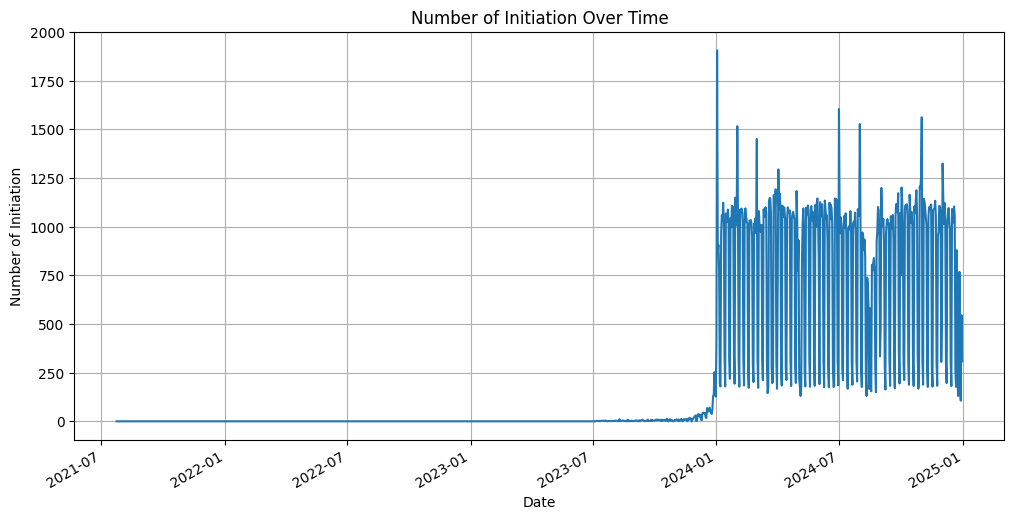

In [168]:
# total Number of Initiation over time
data.groupby("Service From Date").size().plot(figsize=(12,6), title="Number of Initiation Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Initiation")
plt.grid()
plt.show()

As expected (bc of the data-first steps) the most data has started date of service ("Service From Date") during the year 2024

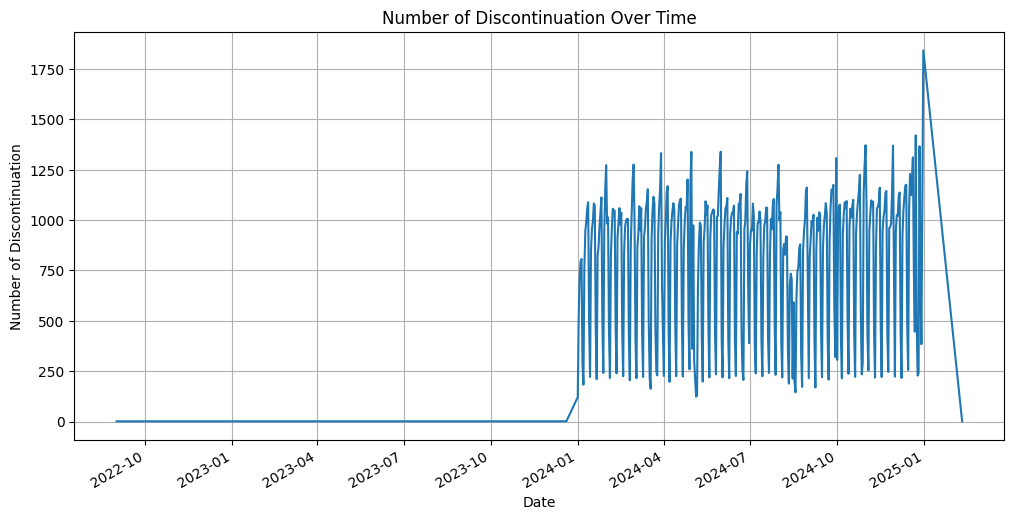

In [ ]:
# total Number of Discontinuation over time
data.groupby("Service To Date").size().plot(figsize=(12,6), title="Number of Discontinuation Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Discontinuation")
plt.grid()
plt.show()

In [143]:
data["Month"]=data["Invoice Date"].dt.month

In [144]:
data.groupby("Month")["Invoice Nbr OBF"].nunique()
#data.groupby("Month").size()

,Invoice Nbr OBF
Month,
1,23524
2,23756
3,23877
4,25110
5,23514
6,23568
7,25735
8,20998
9,24270


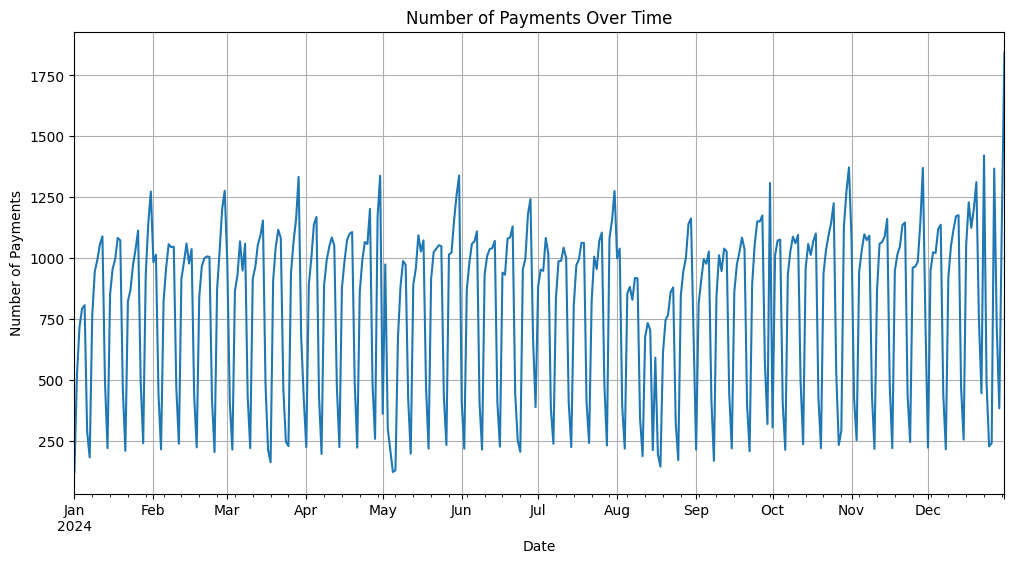

In [145]:
# total Number of Payments over time
data.groupby("Invoice Date").size().plot(figsize=(12,6), title="Number of Payments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

In [146]:
# Periods within a specific month(January) with the highest Number of Payments
data_month=data[data["Month"] == 1].groupby("Invoice Date").size().sort_values(ascending=False).head(10)

# put those days in order
data_month.index = pd.to_datetime(data_month.index)
data_month = data_month.sort_index()
data_month

,0
Invoice Date,
2024-01-10,993
2024-01-11,1056
2024-01-12,1089
2024-01-17,995
2024-01-18,1083
2024-01-19,1073
2024-01-25,1036
2024-01-26,1113
2024-01-30,1142


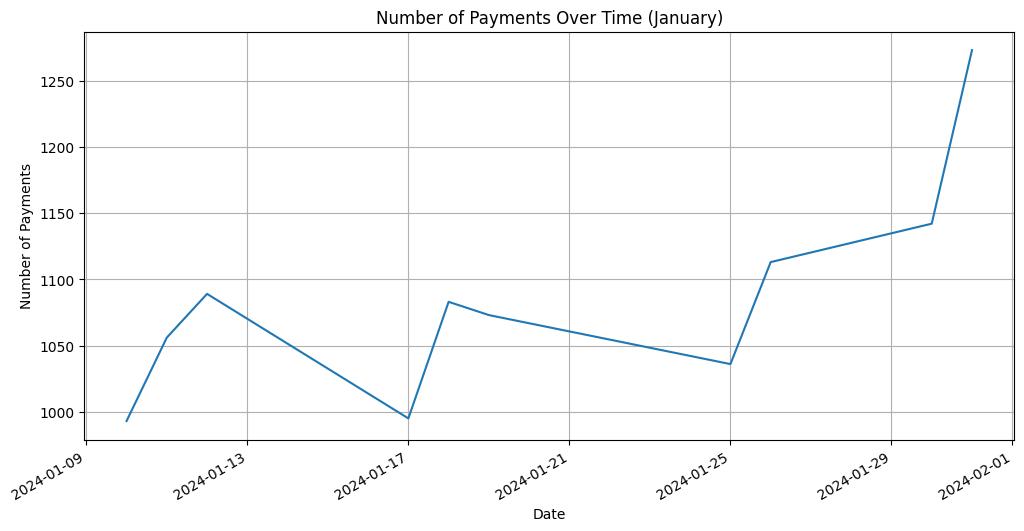

In [147]:
data_month.plot(figsize=(12,6), title="Number of Payments Over Time (January)")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

Number of Payments was calculated over time, but no clear trend was observed. Specifically, each month has a similar Number of Payments. Additionally, Number of Payments occur throughout the month without concentrating in any specific period.

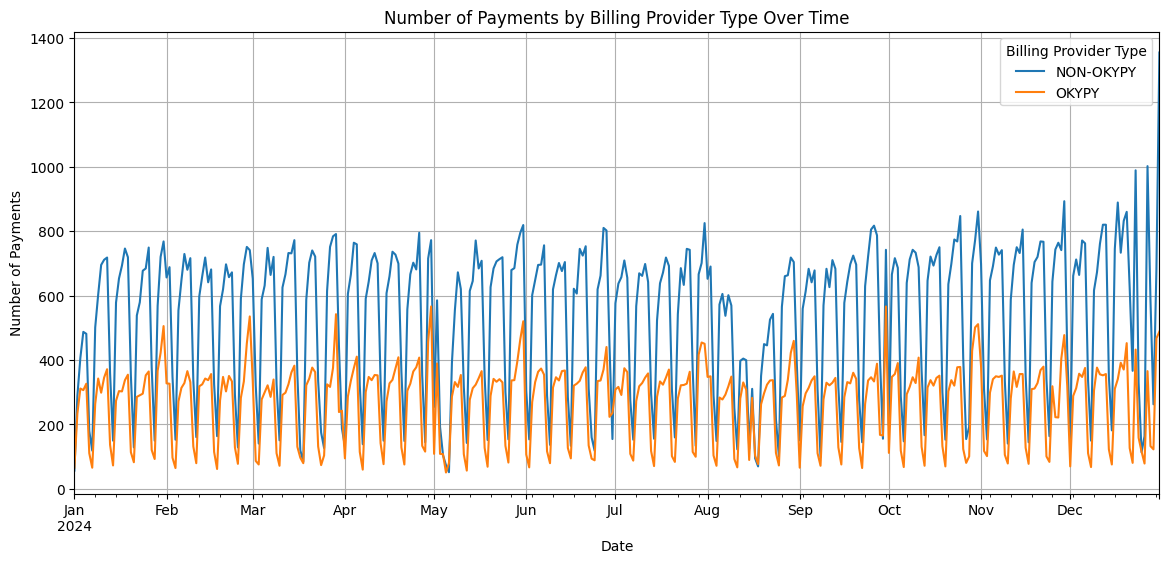

In [148]:
data_grouped_Provider = data.groupby(["Invoice Date", "Billing Provider Type"]).size().unstack().fillna(0)
data_grouped_Provider.plot(figsize=(14,6), title="Number of Payments by Billing Provider Type Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

In [149]:
# Periods within a specific month(August) with the lowest Number of Discontinuation
data_month=data[data["Month"] ==8].groupby("Invoice Date").size().sort_values(ascending=True).head(10)

data_month

,0
Invoice Date,
2024-08-18,145
2024-08-25,172
2024-08-11,188
2024-08-17,196
2024-08-15,213
2024-08-04,219
2024-08-24,326
2024-08-10,343
2024-08-03,393


In [150]:
data_grouped_Provider["NON-OKYPY"][data_grouped_Provider.index].sort_values(ascending=False).head(10)

,NON-OKYPY
Invoice Date,
2024-12-31,1355
2024-12-27,1002
2024-12-23,989
2024-11-29,893
2024-12-17,889
2024-10-31,861
2024-12-20,860
2024-10-25,847
2024-12-19,832


As expected, since the number of usage in Non-Okypy is generally higher than in Okypy, this trend remains steady over time—there is never a point where Non-Okypy Number of Payments fall below those of Okypy. However, we observe that at the end of each month, Okypy Number of Payments increases compared to the rest of the month. Meanwhile, Non-Okypy Number of Payments remain generally steady over time, except for a noticeable decrease in August.

The lowest Number of Payments are in 18 of August for Non-okypy, why? - after holidays?

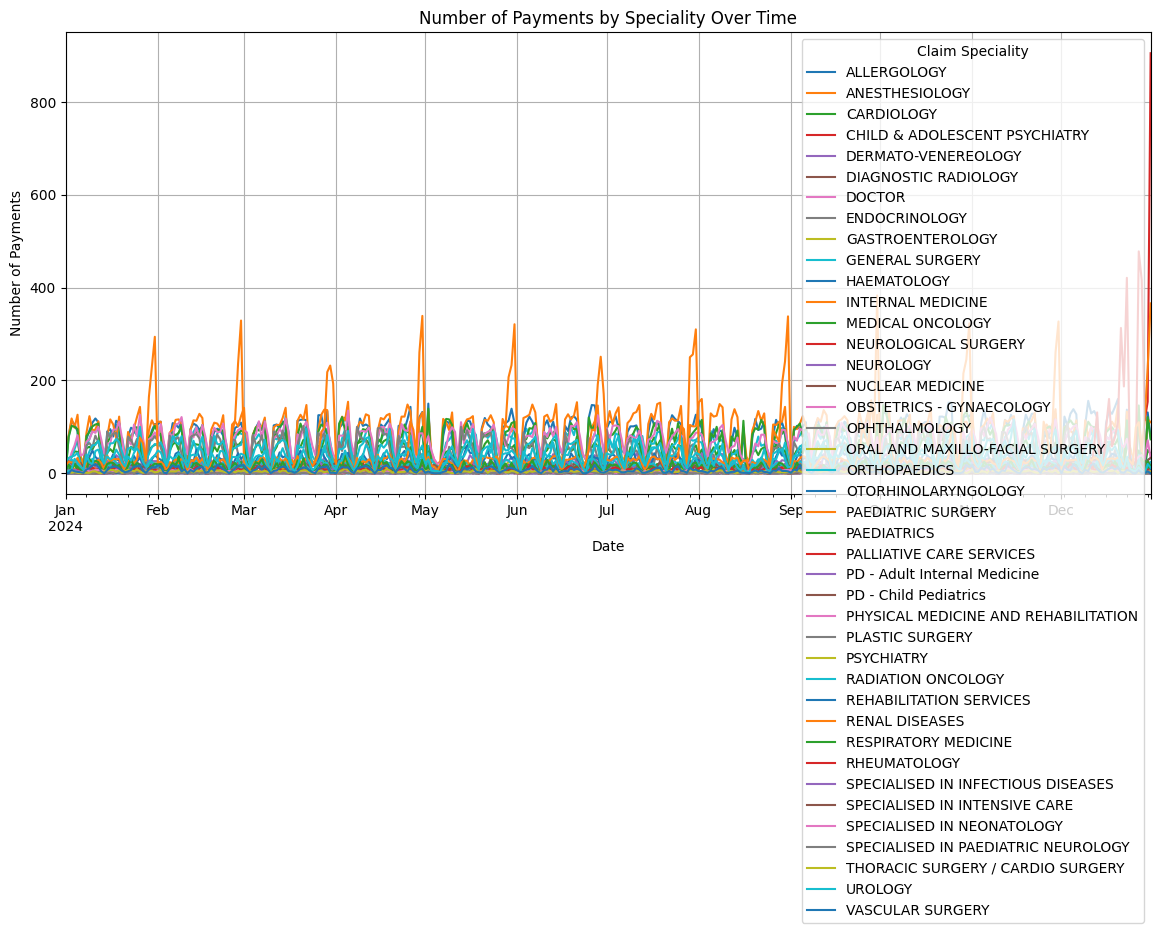

In [151]:
# visits by Speciality over time
data_grouped_Speciality = data.groupby(["Invoice Date", "Claim Speciality"]).size().unstack().fillna(0)
data_grouped_Speciality.plot(figsize=(14,6), title="Number of Payments by Speciality Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

It is observed an increase in the Number of Payments at the end of each month for a specific speciality. (Below is the steps that we are going to find that speciality)

In [33]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Day'] = data['Invoice Date'].dt.day

In [34]:
end_of_month_visits = data[data['Day'] >= 28]

In [35]:
end_specialty_counts = end_of_month_visits['Claim Speciality'].value_counts()
print(end_specialty_counts.head(10))

Claim Speciality
RENAL DISEASES              8733
INTERNAL MEDICINE           3567
HAEMATOLOGY                 3179
OBSTETRICS - GYNAECOLOGY    3112
MEDICAL ONCOLOGY            2814
GENERAL SURGERY             2720
ORTHOPAEDICS                1949
CARDIOLOGY                  1873
PALLIATIVE CARE SERVICES    1719
OPHTHALMOLOGY               1547
Name: count, dtype: int64


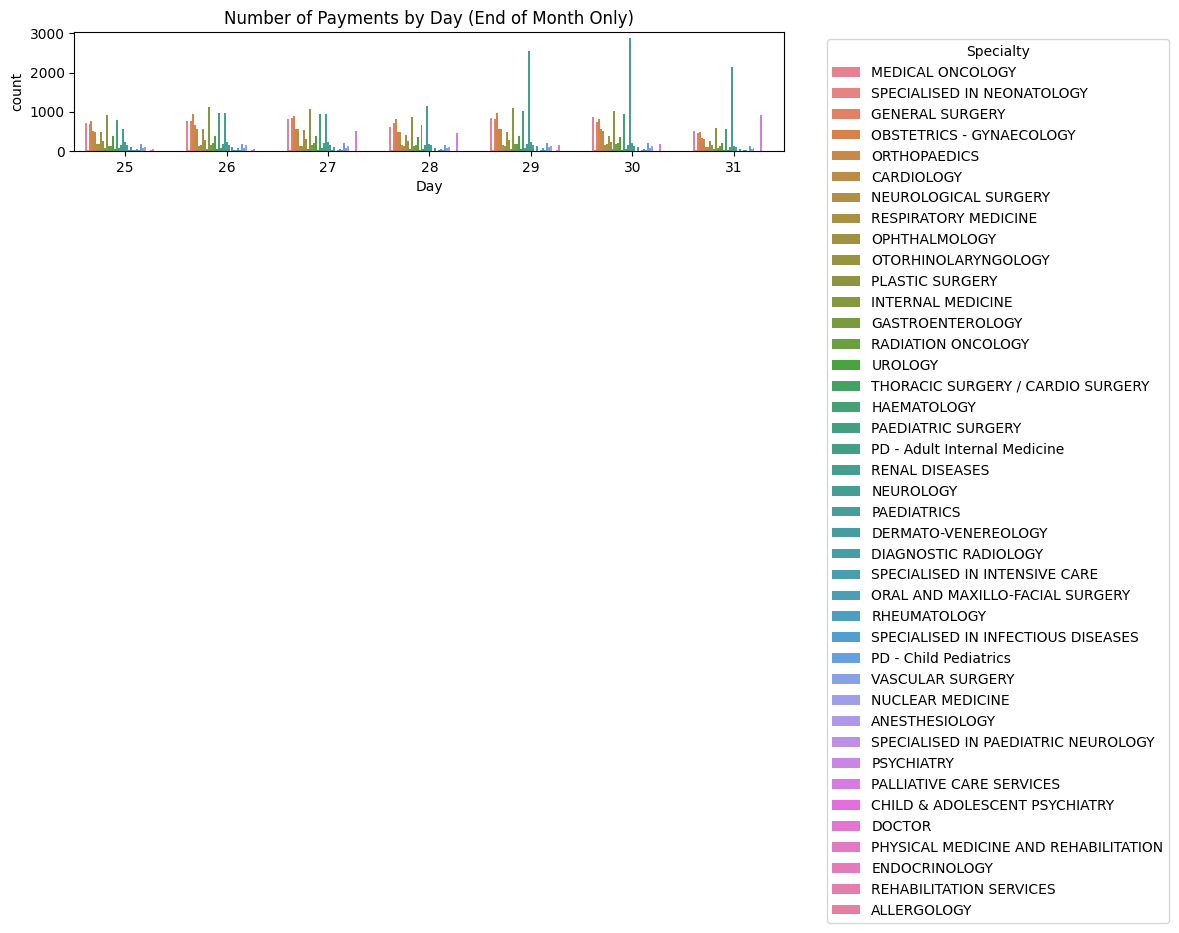

In [152]:
# Keep only day and specialty
subset = data[data['Day'] >= 25]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='Day', hue='Claim Speciality')
plt.title("Number of Payments by Day (End of Month Only)")
plt.legend(title="Specialty", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [154]:
top_specialties=subset[subset["Day"]==28]['Claim Speciality'].value_counts().head(5).index

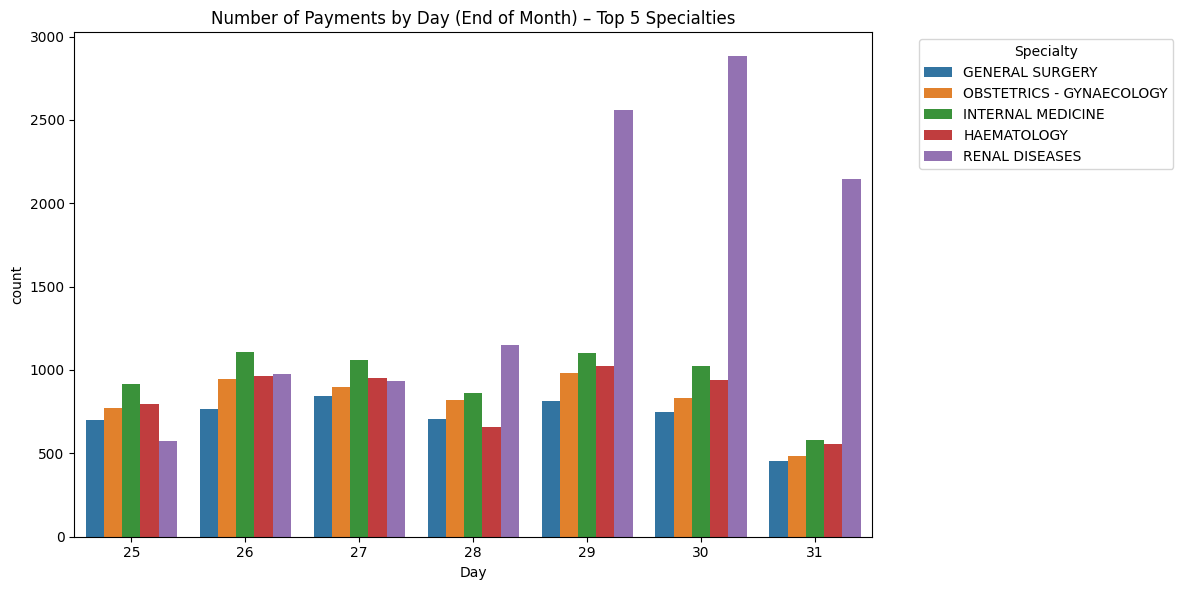

In [155]:
subset_top = subset[subset['Claim Speciality'].isin(top_specialties)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset_top, x='Day', hue='Claim Speciality')
plt.title("Number of Payments by Day (End of Month) – Top 5 Specialties")
plt.legend(title="Specialty", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

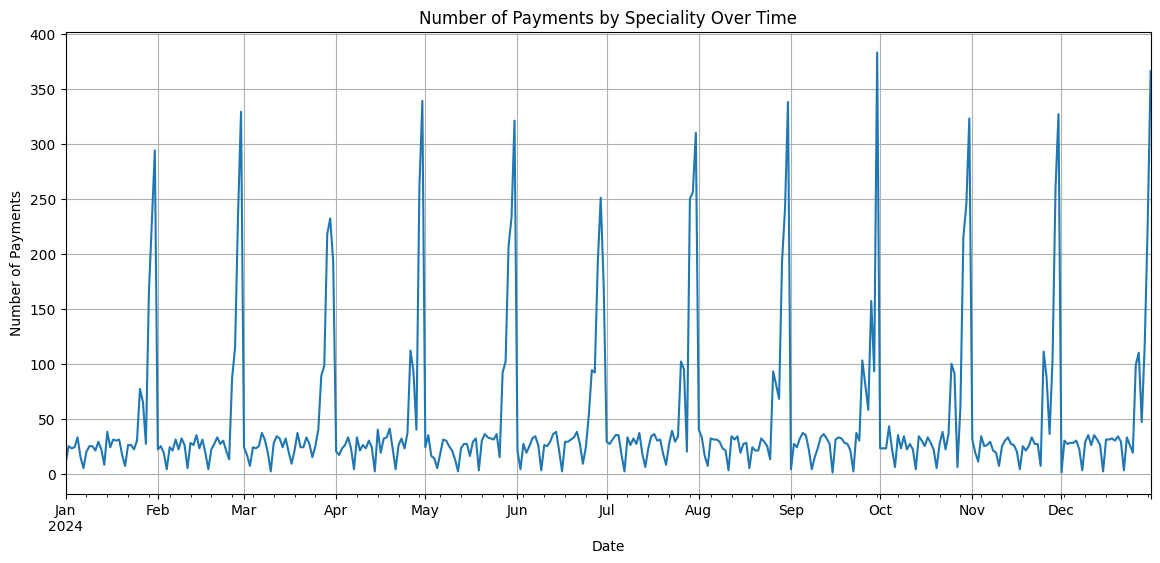

In [156]:
df_grouped = data.groupby(["Invoice Date", "Claim Speciality"]).size().unstack().fillna(0)
df_grouped["RENAL DISEASES"].plot(figsize=(14,6), title="Number of Payments by Speciality Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

It is found that the speciality that at the end of each month there is observed an increase on theNumber of Payments is "RENAL DISEASES", is there any reason for that?

(Haemodialysis is usually done about 3 times a week, either at hospital or at home.??)

In [42]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Month'] = data['Invoice Date'].dt.month
data['Day'] = data['Invoice Date'].dt.day

# Filter for December (month = 12) and day >= 28
december_end = data[(data['Month'] == 12) & (data['Day'] >= 28)]

In [43]:
dec_visits_per_specialty = december_end['Claim Speciality'].value_counts()
print(dec_visits_per_specialty)

Claim Speciality
PALLIATIVE CARE SERVICES                1589
RENAL DISEASES                           756
INTERNAL MEDICINE                        297
HAEMATOLOGY                              214
MEDICAL ONCOLOGY                         213
OBSTETRICS - GYNAECOLOGY                 173
CARDIOLOGY                               138
GENERAL SURGERY                          104
PD - Child Pediatrics                     94
ORTHOPAEDICS                              65
PD - Adult Internal Medicine              63
RESPIRATORY MEDICINE                      49
RADIATION ONCOLOGY                        44
PAEDIATRICS                               44
NEUROLOGY                                 36
UROLOGY                                   36
GASTROENTEROLOGY                          32
NUCLEAR MEDICINE                          23
OTORHINOLARYNGOLOGY                       20
NEUROLOGICAL SURGERY                      14
SPECIALISED IN NEONATOLOGY                13
RHEUMATOLOGY                          

In [44]:
max_specialty = dec_visits_per_specialty.idxmax()
max_count = dec_visits_per_specialty.max()

print(f"Specialty with max Number of Payments at end of December: {max_specialty} ({max_count} Number of Payments)")

Specialty with max visits at end of December: PALLIATIVE CARE SERVICES (1589 visits)


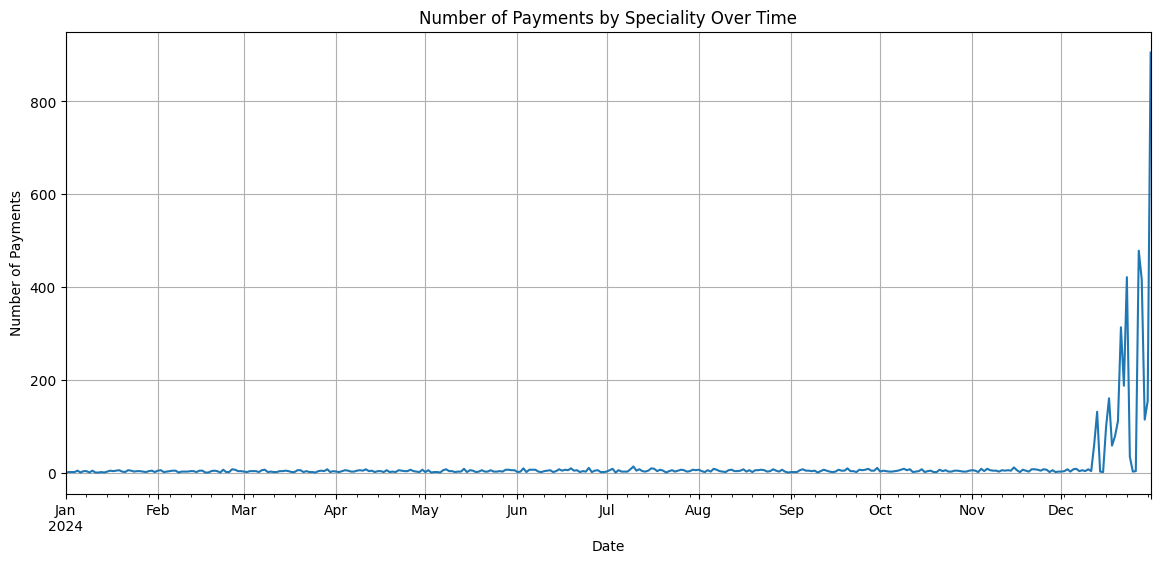

In [157]:
df_grouped = data.groupby(["Invoice Date", "Claim Speciality"]).size().unstack().fillna(0)
df_grouped["PALLIATIVE CARE SERVICES"].plot(figsize=(14,6), title="Number of Payments by Speciality Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

Another trend observed for the specialty "PALLIATIVE CARE SERVICES" is a noticeable increase in Number of Payments at the end of December, while visits remained negligible throughout the rest of the year. Why?? - maybe because are the days of holidays - but why only in that specific category?

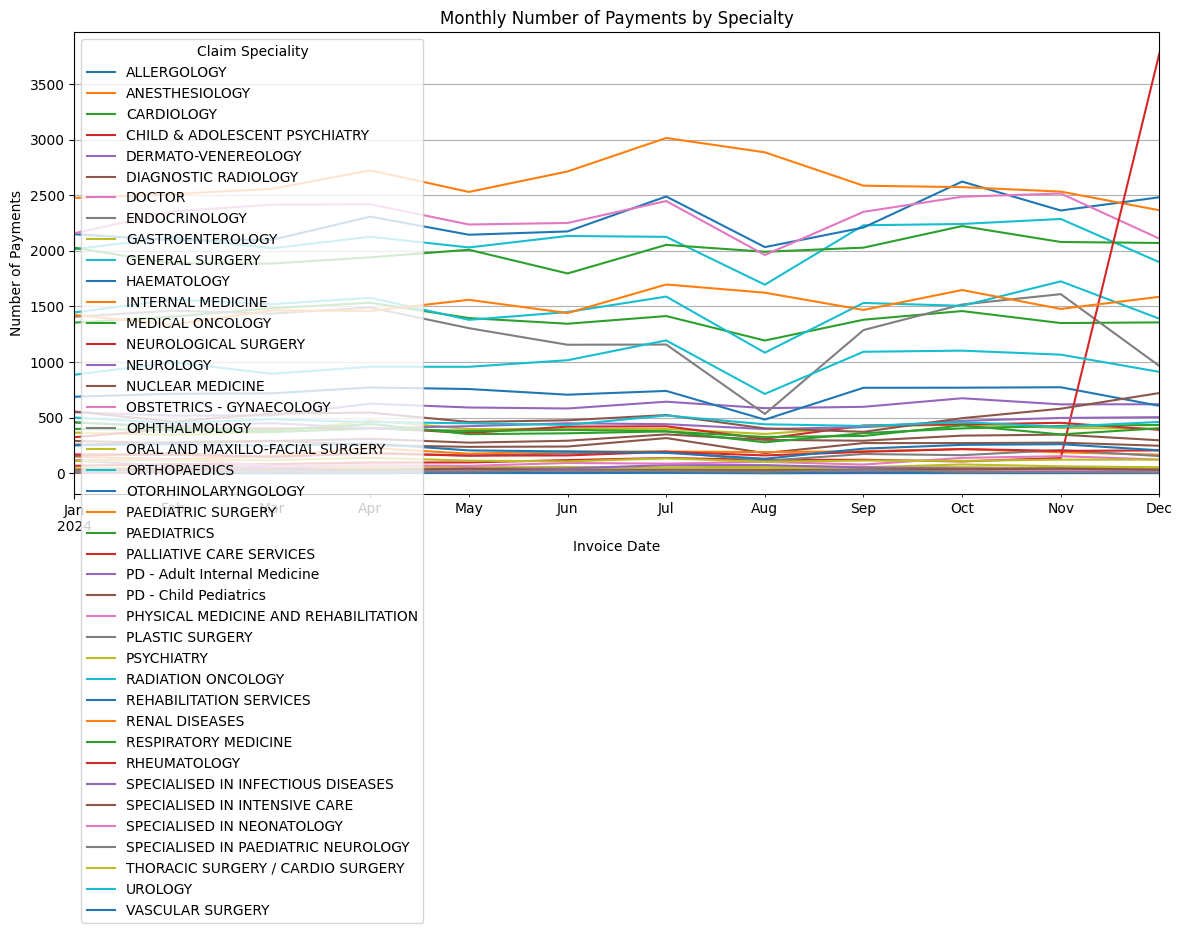

In [158]:
# Monthly or weekly trends
monthly = data.set_index("Invoice Date").groupby("Claim Speciality").resample('M').size().unstack(0)
monthly.plot(figsize=(14,6), title="Monthly Number of Payments by Specialty")
plt.ylabel("Number of Payments")
plt.grid()
plt.show()

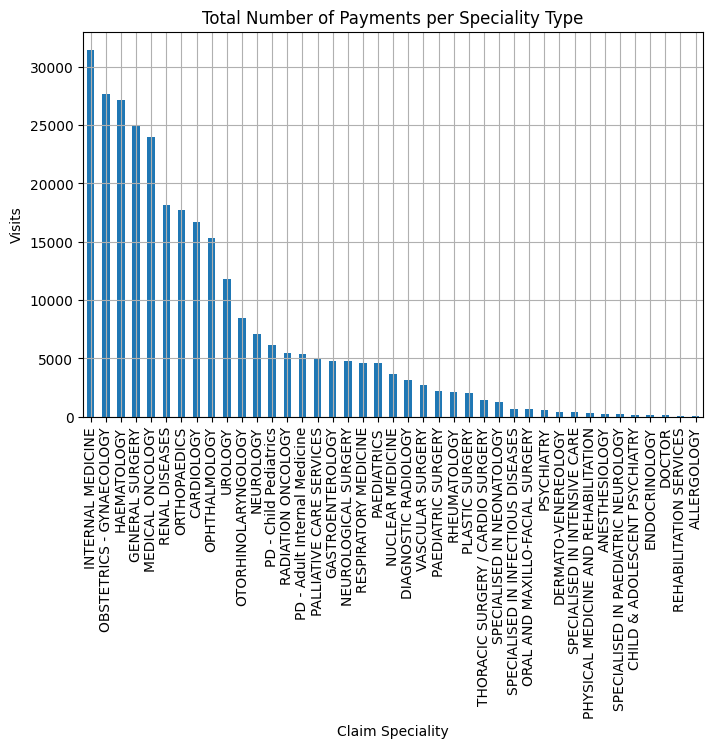

In [159]:
#total visits per doctor type
data["Claim Speciality"].value_counts().plot(kind='bar', figsize=(8,5), title="Total Number of Payments per Speciality Type")
plt.ylabel("Visits")
plt.grid()
plt.show()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Segment_ID                 293481 non-null  object        
 1   Invoice Nbr OBF            293481 non-null  int64         
 2   Invoice Date               293481 non-null  datetime64[ns]
 3   Billing Provider Code OBF  293481 non-null  object        
 4   Billing Provider Type      293481 non-null  object        
 5   Professional Code OBF      293481 non-null  object        
 6   Claim Specialty Id         293481 non-null  object        
 7   Claim Speciality           293481 non-null  object        
 8   Life Nbr OBF               293481 non-null  int64         
 9   Service From Date          293481 non-null  datetime64[ns]
 10  Service To Date            293481 non-null  datetime64[ns]
 11  Length of Stay             293481 non-null  int64   

In [172]:
pivot=pd.pivot_table(data,index="Claim Speciality",values="Length of Stay",aggfunc="mean")
top_specialties =pivot["Length of Stay"].sort_values(ascending=False).head(10)
top_specialties

,Length of Stay
Claim Speciality,
PALLIATIVE CARE SERVICES,203.844642
PHYSICAL MEDICINE AND REHABILITATION,79.558394
REHABILITATION SERVICES,61.119048
DOCTOR,25.710526
RENAL DISEASES,20.240662
PSYCHIATRY,15.456998
SPECIALISED IN NEONATOLOGY,12.712766
CHILD & ADOLESCENT PSYCHIATRY,11.869318
THORACIC SURGERY / CARDIO SURGERY,11.617730


It is observed that the top 10 specialities with the maximum length of Stay on average are the specalities as are showed above.

In [192]:
top_specialties_names=list(top_specialties.index)
top_specialties_names

['PALLIATIVE CARE SERVICES',
 'PHYSICAL MEDICINE AND REHABILITATION',
 'REHABILITATION SERVICES',
 'DOCTOR',
 'RENAL DISEASES',
 'PSYCHIATRY',
 'SPECIALISED IN NEONATOLOGY',
 'CHILD & ADOLESCENT PSYCHIATRY',
 'THORACIC SURGERY / CARDIO SURGERY',
 'MEDICAL ONCOLOGY']

In [201]:
data_grouped_Speciality=data.groupby(["Service From Date","Claim Speciality"]).size().unstack().fillna(0)

In [202]:
pivot_top_Speciality=data_grouped_Speciality.loc[:,data_grouped_Speciality.columns.isin(top_specialties_names)==1]

In [203]:
# Remove from "Service From Date" values that in all columns have zeros
pivot_top_Speciality=pivot_top_Speciality[pivot_top_Speciality.sum(axis=1)!=0]
pivot_top_Speciality

# sum based on the month
pivot_top_Speciality=pivot_top_Speciality.groupby(pivot_top_Speciality.index.month).sum()
pivot_top_Speciality

Claim Speciality,CHILD & ADOLESCENT PSYCHIATRY,DOCTOR,MEDICAL ONCOLOGY,PALLIATIVE CARE SERVICES,PHYSICAL MEDICINE AND REHABILITATION,PSYCHIATRY,REHABILITATION SERVICES,RENAL DISEASES,SPECIALISED IN NEONATOLOGY,THORACIC SURGERY / CARDIO SURGERY
Service From Date,,,,,,,,,,
1,7.0,14.0,2068.0,1800.0,23.0,42.0,0.0,1432.0,124.0,125.0
2,11.0,15.0,1907.0,526.0,25.0,46.0,2.0,1329.0,119.0,127.0
3,25.0,8.0,1882.0,285.0,21.0,42.0,3.0,1484.0,66.0,108.0
4,38.0,8.0,2002.0,335.0,25.0,49.0,7.0,1461.0,79.0,136.0
5,26.0,9.0,2033.0,268.0,29.0,51.0,5.0,1556.0,82.0,116.0
6,15.0,8.0,1779.0,265.0,19.0,55.0,4.0,1437.0,65.0,110.0
7,5.0,10.0,2047.0,298.0,23.0,47.0,8.0,1712.0,106.0,135.0
8,13.0,12.0,1979.0,220.0,21.0,64.0,4.0,1644.0,100.0,93.0
9,4.0,8.0,2012.0,279.0,25.0,61.0,6.0,1427.0,73.0,120.0


<Axes: xlabel='Service From Date'>

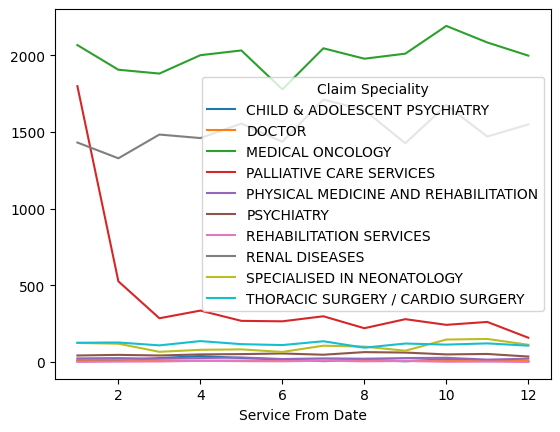

In [204]:
pivot_top_Speciality.plot(kind="line")

It is observed that most of the top specialities that had the maximum length of stay on average have a steady number of people that initial the treatment for each month expect the "Paaliative Care Services" that it is observed to has the maximum number of treatment initiation at the beggining of January and then is decreasing dramatically and stays steady for the next months.

<Axes: xlabel='Service To Date'>

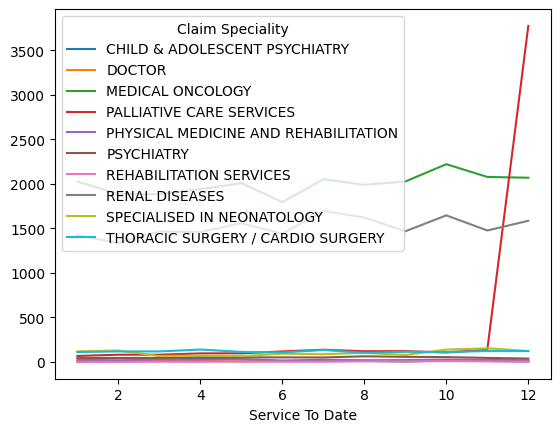

In [205]:
data_grouped_Speciality=data.groupby(["Service To Date","Claim Speciality"]).size().unstack().fillna(0)

pivot_top_Speciality=data_grouped_Speciality.loc[:,data_grouped_Speciality.columns.isin(top_specialties_names)==1]

# Remove from "Service From Date" values that in all columns have zeros
pivot_top_Speciality=pivot_top_Speciality[pivot_top_Speciality.sum(axis=1)!=0]
pivot_top_Speciality

# sum based on the month
pivot_top_Speciality=pivot_top_Speciality.groupby(pivot_top_Speciality.index.month).sum()
pivot_top_Speciality

pivot_top_Speciality.plot(kind="line")

Regarding the frequency that a person descontintue his treatment it is observed that from the top specialities (that has the maximum length of stay) are stable during the year except the speciality "Palliative care services" where there is an increase in the number of discontinue at the end of the year.